#### Imported the  libraries

In [51]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.arima.model import ARIMA

#### loading the data set 

In [ ]:
df = pd.read_csv("./Weather_Data.csv")


,Date,City,Temperature (°C),Humidity (%),Wind Speed (km/h),Weather Condition
0,2021-12-07,West Rachel,38.9,75,29.0,Rainy
1,2020-08-30,Port Jill,37.7,67,2.7,Rainy
2,2025-04-19,Priscillafurt,6.8,86,8.6,Cloudy
3,2021-05-01,Jacobmouth,22.1,63,12.2,Sunny
4,2020-05-07,Moranhaven,30.2,39,0.6,Cloudy
...,...,...,...,...,...,...
95,2020-02-29,Carrville,29.1,73,14.2,Snowy
96,2020-09-23,South Beverly,-9.2,92,23.7,Sunny
97,2021-07-24,Seanburgh,-3.9,17,12.4,Sunny
98,2024-12-17,Lake Tanyamouth,27.6,81,21.3,Rainy


In [54]:
# converting the data column ti date time 
df['Date'] = pd.to_datetime(df['Date'])

# setting date column as index
df.set_index('Date', inplace=True)

df.head()

KeyError: 'Date'

In [5]:
# preprocessing of the data 

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               100 non-null    object 
 1   City               100 non-null    object 
 2   Temperature (°C)   100 non-null    float64
 3   Humidity (%)       100 non-null    int64  
 4   Wind Speed (km/h)  100 non-null    float64
 5   Weather Condition  100 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 4.8+ KB


In [6]:
df.duplicated().sum()

np.int64(0)

In [11]:

# Basic sanity check
print(df.describe())


                      Date  Temperature (°C)  Humidity (%)  Wind Speed (km/h)
count                  100        100.000000    100.000000         100.000000
mean   2022-07-02 13:55:12         16.507000     54.900000          13.217000
min    2020-01-16 00:00:00         -9.300000     10.000000           0.100000
25%    2021-03-03 18:00:00          2.750000     32.750000           5.975000
50%    2022-02-05 12:00:00         17.900000     56.500000          12.950000
75%    2023-11-06 12:00:00         29.250000     77.250000          20.125000
max    2025-06-08 00:00:00         39.700000     96.000000          29.700000
std                    NaN         14.805174     25.844328           8.703582


In [20]:
df['date'] = pd.to_datetime(df['Date'])


In [21]:
df.set_index('date',inplace=True)

In [19]:
df

,Date,City,Temperature (°C),Humidity (%),Wind Speed (km/h),Weather Condition
date,,,,,,
2021-12-07,2021-12-07,West Rachel,38.9,75,29.0,Rainy
2020-08-30,2020-08-30,Port Jill,37.7,67,2.7,Rainy
2025-04-19,2025-04-19,Priscillafurt,6.8,86,8.6,Cloudy
2021-05-01,2021-05-01,Jacobmouth,22.1,63,12.2,Sunny
2020-05-07,2020-05-07,Moranhaven,30.2,39,0.6,Cloudy
...,...,...,...,...,...,...
2020-02-29,2020-02-29,Carrville,29.1,73,14.2,Snowy
2020-09-23,2020-09-23,South Beverly,-9.2,92,23.7,Sunny
2021-07-24,2021-07-24,Seanburgh,-3.9,17,12.4,Sunny


In [30]:
# Handle missing values
df.fillna(method='ffill', inplace=True)

/var/folders/j6/2w5njgp15332sfj8ybwvwwp40000gn/T/ipykernel_47189/1461690812.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [33]:
# Select one city for analysis
city_name = df['City'].iloc[0]
city_df = df[df['City'] == city_name]

print(city_name)
print(city_df)

West Rachel
                  Date         City  Temperature (°C)  Humidity (%)  \
date                                                                  
2021-12-07  2021-12-07  West Rachel              38.9            75   

            Wind Speed (km/h) Weather Condition  
date                                             
2021-12-07               29.0             Rainy  


In [35]:
print("Analysing data for city:", city_name)

print("\nTemperature Summary")
print(city_df['Temperature (°C)'].describe())

Analysing data for city: West Rachel

Temperature Summary
count     1.0
mean     38.9
std       NaN
min      38.9
25%      38.9
50%      38.9
75%      38.9
max      38.9
Name: Temperature (°C), dtype: float64


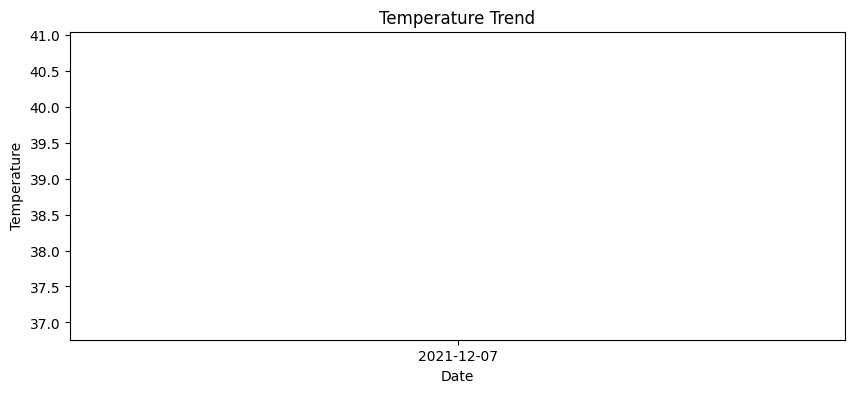

In [40]:
# -------------------------------------
# 4. TEMPERATURE TREND (VISUAL)
# -------------------------------------
plt.figure(figsize=(10,4))
plt.plot(city_df['Date'], city_df['Temperature (°C)'])
plt.title("Temperature Trend")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.show()